<a href="https://colab.research.google.com/github/microprediction/microprediction/blob/master/get_and_show_submitted_predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip uninstall -y numpy

In [ ]:
!pip install --upgrade pytz   # Shouldn't be necessary
!pip install microprediction 

## Get submitted predictions

In [10]:
from microprediction import MicroReader
WRITE_KEY = "bd593aac9ef3518b4168592e75c241d1" # <-- replace with your own 
NAME = "ginj-intraday-tactical-asset-allocation-energy-mean.json" #<--- replace with your own 
mr = MicroReader(base_url="https://devapi.microprediction.org")   # Won't need base_url arg by the time you read this
delay = mr.DELAYS[-1] # About one hour
samples = mr.get_predictions(name=NAME,delay=mr.DELAYS[-1],write_key=WRITE_KEY)
print(samples[:4])

[-0.34263141238185024, -0.2787739817017831, -0.2742132641781175, -0.24421155029544128]


## Get submitted predictions with owners

In [12]:
owners_and_samples = mr.get_predictions(name=NAME,delay=mr.DELAYS[-1],write_key=WRITE_KEY,consolidate=False)
print(owners_and_samples[:5])

[('da90ba3076e9ab35524d62350b2b8620', -0.34263141238185024), ('da90ba3076e9ab35524d62350b2b8620', -0.2787739817017831), ('da90ba3076e9ab35524d62350b2b8620', -0.2742132641781175), ('da90ba3076e9ab35524d62350b2b8620', -0.24421155029544128), ('da90ba3076e9ab35524d62350b2b8620', -0.22293920463024972)]


# Plot submitted predictions 

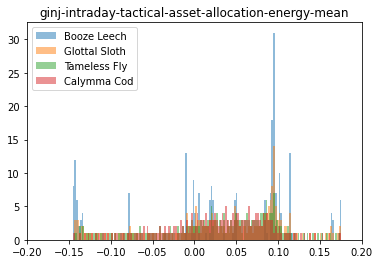

In [16]:
num_to_show = 4
import matplotlib.pyplot as plt
codes = list(set([c for c,v in owners_and_samples]))
for code in codes[:num_to_show]:
    animal = mr.animal_from_code(code)
    smpl = [v for c,v in owners_and_samples if c==code]
    plt.hist(smpl, bins=150, alpha=0.5, label=animal)
plt.legend(loc='upper left')
plt.title(NAME.replace('.json',''))
plt.xlim(-0.2,0.2)
plt.show()